In [2]:
import neurom as nm
from neurom import viewer
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
sys.path[0] = str(Path(sys.path[0]).parent)
#from mouselight_code.src import read_swc, visualize, octree, combine_swc_img
from neurom.io import swc
from neurom import morphmath, stats

# Reading in Abnormal SWC data (Missing soma and non-standard labels)

In [3]:
path1 = "test_data/swc/Neuron.swc"
path2 = "test_data/swc/Single_apical_no_soma.swc"
path3 = "test_data/swc/custom_type.swc"

## Standard Neuron

[[  0.           0.           0.           0.1       ]
 [  0.           0.2          0.           0.1       ]
 [  0.1          0.1          0.           0.1       ]
 ...
 [ 63.62775338 -51.63308303  53.20846932   0.77868578]
 [ 64.05608725 -52.04660402  53.29780708   0.86904222]
 [ 64.74726272 -52.79933308  54.20408797   0.89648315]]


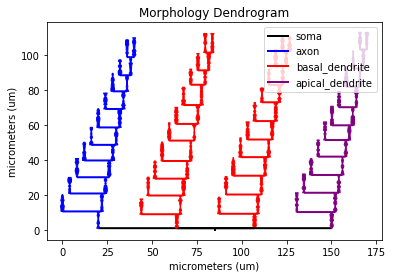

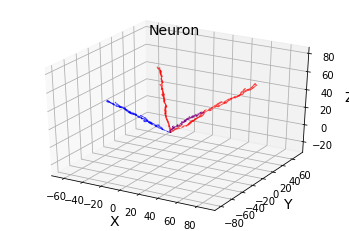

In [18]:
gt_test = nm.load_neuron(path1)
viewer.draw(gt_test, mode = 'dendrogram')
viewer.draw(gt_test, mode = '3d')
plt.show()

# Neuron with Soma removed

No soma found, setting soma at first row


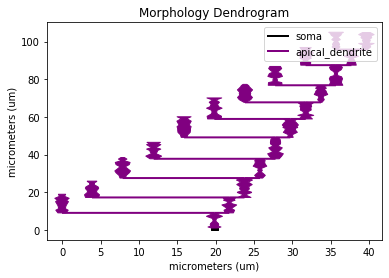

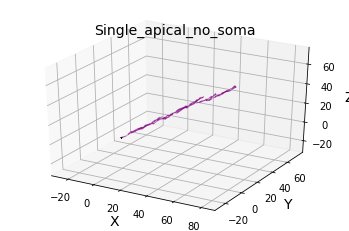

In [5]:
no_soma = nm.load_neuron(path2)
viewer.draw(no_soma, mode = 'dendrogram', output_path = 'NeuroM/figures')
viewer.draw(no_soma, mode = '3d', output_path = 'NeuroM/figures')
plt.show()

In [6]:
# Morph math tests
print(morphmath.average_points_dist(no_soma.points[0], no_soma.points))
print(morphmath.angle_3points(no_soma.points[0],no_soma.points[4],no_soma.points[5]))


45.717699219241425
0.024286796108778153


## Neuron with custom labels (Does not include 1-4)

SWC in custom format, reading > 4 as undefined
No soma found, setting soma at first row


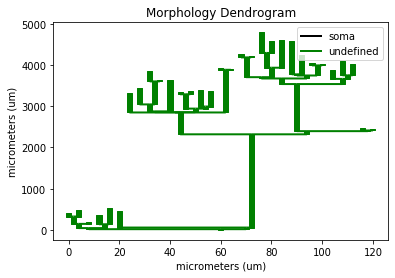

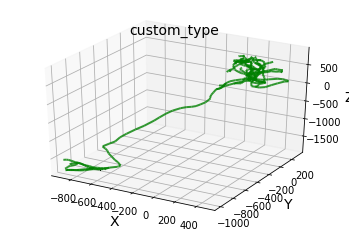

In [7]:
custom = nm.load_neuron(path3)
viewer.draw(custom, mode = 'dendrogram', output_path = 'NeuroM/figures')
viewer.draw(custom, mode = '3d', output_path = 'NeuroM/figures')
plt.show()

# Stats on Custom Type Neurons

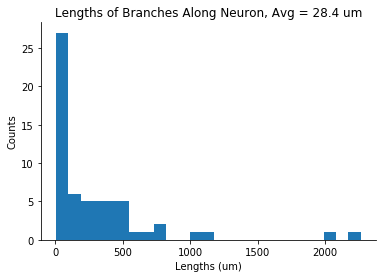

In [10]:
len_list = []
for i in range(len(custom.sections)):
    sections = custom.sections[i].length
    len_list.append(sections)
ax = plt.subplot(111)
ax.hist(len_list, bins = 25)
plt.title("Lengths of Branches Along Neuron, Avg = 28.4 um")
plt.xlabel("Lengths (um)")
plt.ylabel("Counts")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig("Branch_lens.png")
plt.show()

9.98360655737705


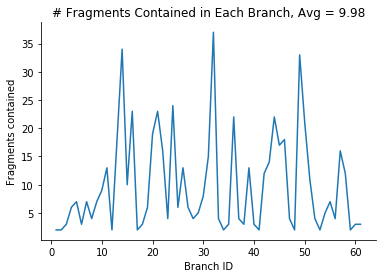

In [13]:
frags_list = []
for i in range(len(custom.sections)):
    num_pts = len(custom.sections[i].points)
    frags_list.append(num_pts)
ax = plt.subplot(111)

print(np.mean(frags_list))
ax.plot(range(1,len(custom.sections)+1),frags_list)
plt.xlabel("Branch ID")
plt.ylabel("Fragments contained")
plt.title("# Fragments Contained in Each Branch, Avg = 9.98")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig("frag_counts.png")
plt.show()

## Morphology Math 

In [43]:
avg_dist = morphmath.average_points_dist(custom.points[0], custom.points[1:])
#avg_seg_len = morphmath.segment_length(custom.sections.points)
gt_test.sections[0]

Section(id=0, type=NeuriteType.soma, n_points=2) <parent: None, nchildren: 0>

In [52]:
custom.sections[0].points

array([[-1.20873367e+02,  1.47758570e+02, -1.92422286e+02,
         1.00000000e+00,  0.00000000e+00,  5.49000000e+02,
         5.48000000e+02],
       [-6.59974775e+02, -8.58919537e+02, -1.86293919e+03,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00]])

In [30]:
morphmath.path_distance(custom.points)

25199.41425984822

In [27]:
morphmath.principal_direction_extent(custom.points[:,:3])

array([3633.39633992,  787.48930716,  784.28555576])

In [33]:
morphmath.pca(custom.points[:,:3])

(array([895711.27241417,   6235.72224786,  25042.94392065]),
 array([[-0.35135926, -0.80584821, -0.47660816],
        [-0.38805257,  0.58862856, -0.70917672],
        [-0.85203397,  0.06422679,  0.51953156]]))